#### Practicing linear regression

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## creating custom dataset
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=500,n_features=3,noise=15,random_state=42)

In [5]:
df = pd.DataFrame(X,columns=['feature1','feature2','feature3'])
df['target'] = y

In [8]:
## adding missing values
df.loc[df.sample(frac=0.1, random_state=42).index, "feature1"] = np.nan
# Add outliers
df.loc[df.sample(frac=0.05, random_state=42).index, "feature2"] *= 10

In [10]:
df.columns

Index(['feature1', 'feature2', 'feature3', 'target', 'Feature1'], dtype='object')

In [9]:
df.to_csv('Linear-regression-dataset.csv',index=False)

In [26]:
df = pd.read_csv("Linear-regression-dataset.csv")

In [28]:
df.isnull().sum()

feature1     50
feature2      0
feature3      0
target        0
Feature1    500
dtype: int64

In [30]:
df = df.drop('Feature1',axis=1)

In [ ]:
df.isnull()

,feature1,feature2,feature3,target
0,True,False,False,False
1,False,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
495,True,False,False,False
496,False,False,False,False
497,True,False,False,False
498,False,False,False,False


In [33]:
## handling missing values
df_cleaned = df.dropna()

In [44]:
df_cleaned.describe()

,feature1,feature2,feature3,target
count,450.000000,450.000000,450.000000,450.000000
mean,0.130984,-0.045955,0.064493,2.817652
std,0.935154,0.985555,1.037020,101.261301
min,-2.896255,-3.241267,-2.848543,-317.782652
25%,-0.525865,-0.755300,-0.590065,-64.108283
50%,0.180530,-0.037272,0.070684,1.725720
75%,0.661299,0.646741,0.710649,72.769963
max,2.579709,3.078881,3.852731,314.375731


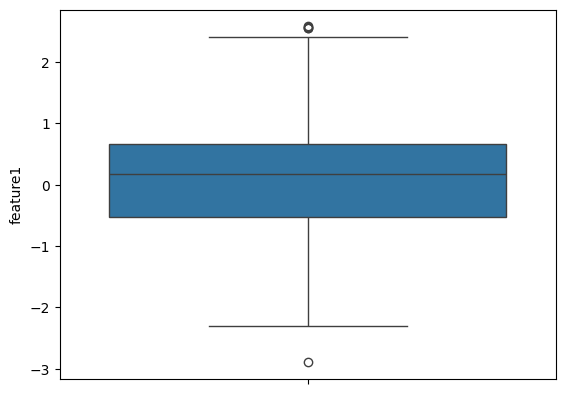

In [45]:
## no dealing with outliers

import seaborn as sns

sns.boxplot(data=df_cleaned["feature1"])
plt.show()

In [46]:
## IQR test to check is the outlier is realistic
# Calculate IQR for Target
Q1 = df_cleaned["target"].quantile(0.25)
Q3 = df_cleaned["target"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find Outliers
outliers_target = df_cleaned[(df_cleaned["target"] < lower_bound) | (df_cleaned["target"] > upper_bound)]
print("Outliers in Target:", outliers_target)

Outliers in Target:      feature1  feature2  feature3      target
201  0.241962 -1.913280 -1.724918 -278.874884
426 -0.059525 -3.241267 -1.024388 -317.782652
464  0.311250  3.078881  1.119575  314.375731


In [47]:
## remove outliers row if not necessary 
df_cleaned = df_cleaned[(df_cleaned["target"] >= lower_bound) & (df_cleaned["target"] <= upper_bound)]

In [51]:
df_cleaned.describe()

,feature1,feature2,feature3,target
count,447.000000,447.000000,447.000000,447.000000
mean,0.130759,-0.041620,0.068572,3.468065
std,0.938197,0.961888,1.034550,98.470208
min,-2.896255,-2.696887,-2.848543,-266.725261
25%,-0.529559,-0.753850,-0.579991,-63.500199
50%,0.177701,-0.034988,0.071566,1.872676
75%,0.670404,0.646286,0.709683,72.263669
max,2.579709,2.601683,3.852731,250.926379


In [53]:
## as we can see we still have outlier in target so again apply IQR
Q1 = df_cleaned['target'].quantile(0.25)
Q2 = df_cleaned['target'].quantile(0.75)
IQR = Q2-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR

ouliers = df_cleaned[(df_cleaned['target'] < lower_bound) | (df_cleaned['target'] > upper_bound)]
print(ouliers)

Empty DataFrame
Columns: [feature1, feature2, feature3, target]
Index: []


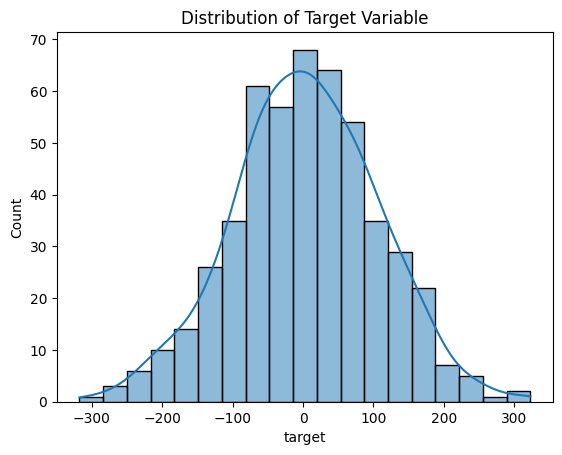

In [54]:
sns.histplot(df["target"], kde=True)
plt.title("Distribution of Target Variable")
plt.show()

In [56]:
## train test split
X= df_cleaned.iloc[:,:3]
y = df_cleaned.iloc[:,3]

In [58]:
y

1      -61.295168
3      166.911150
4       20.971902
5       26.234343
6      131.257154
          ...    
493    -65.042116
494     91.562419
496     -1.052495
498     -9.160712
499     48.589343
Name: target, Length: 447, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [60]:
## train a model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,Y_train)
y_pred = regression.predict(X_test)

In [61]:
## performance metrices
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(Y_test,y_pred))
print(mean_absolute_error(Y_test,y_pred))

0.9787289445278811
11.84328314908033


In [65]:
y.shape

(447,)

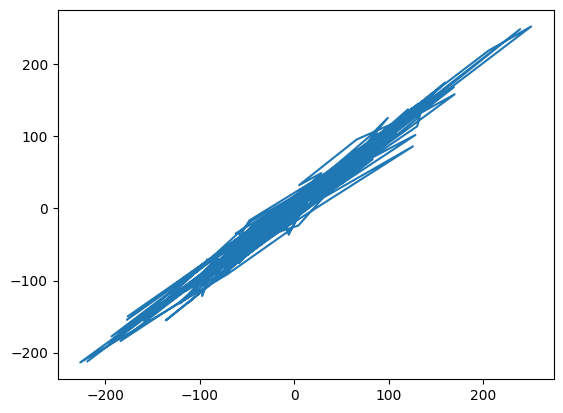

In [69]:
## plot graph
plt.plot(Y_test,y_pred)
plt.show()